# Beverlyn Tucker
# Gilbert Guya

    

## Data Preparation
 
Dataset was obtained from Twitter using the "twitterscape package [1]". The dataset contains tweets 200 emphasizing word AI and 'Artificial Intelligence' within their text. The data transformed before loading, which drop the following columns: URL, Html, likes, retweets, and the full name of the user. Only keep three columns user, timestamp, and text. Then later rename text to tweets and drop the user to prevent bias and to maintain the data integrity.

In [3]:
##import string
from collections import Counter
import pandas as pd
import re
import pandas as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bevst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
#df =pd.read_csv('AI_Tweets_R2.csv',encoding='cp1252')

In [22]:
df =pd.read_csv('AI_Tweets.csv',encoding='cp1252')

In [23]:
df.columns

Index(['id', 'label', 'user', 'timestamp', 'text'], dtype='object')

In [24]:
df.drop(['id', 'label', 'user', 'timestamp'], axis=1, inplace = True)

In [25]:
df=df.rename(columns={'text':'tweets'})
df

,tweets
0,Artificial Intelligence Is Going To Be The End...
1,The Weaponization Of Artificial Intelligence A...
2,The Weaponization Of Artificial Intelligence A...
3,TheChameleon84 wow. I hate Artificial Intellig...
4,this artificial intelligence performance kind ...
...,...
196,Artificial intelligence can now be used to kee...
197,Forex trading service guarantees 99.9% profita...
198,"I had forgotten how much I liked that movie,AI..."
199,What are prominent positive examples of strong...


In [17]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df.tweets[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

## Data Cleaning
Utilize wordcloud function to remove stop words and for data mugging and show the word cloud visualization. "wPk7QWpK8Z", "co", "https"."https","http","@", "I","and","#"

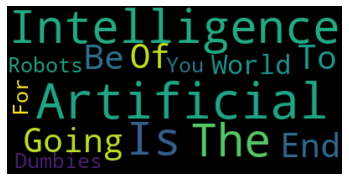

In [18]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df.tweets[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

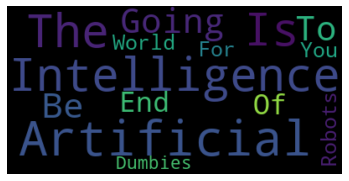

In [19]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = df.tweets[1]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["https","http","@", "I","and","#",])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

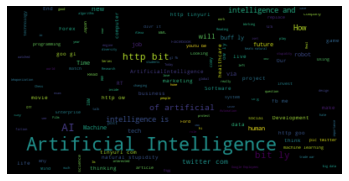

In [26]:
# Start with one review:
#text = mdf.Tweet_Text[1]7370
text= " ".join(review for review in df.tweets)
# Create stopword list:

stopwords.update(["https", "CO", "amp", "one","Im","said","the"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [110]:
#Function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create a new colums
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getpolarity)
#df.head()


def getAnalysis(score):
    if score <0:
        return  'Negative'
    #elif score ==0:
       # return 'Neutral'
    else:
        return 'Positive'
    
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show new data frame
df.head()

,tweets,Subjectivity,Polarity,Analysis
0,Artificial Intelligence Is Going To Be The End...,1.000000,-0.600000,Negative
1,The Weaponization Of Artificial Intelligence A...,1.000000,-0.600000,Negative
2,The Weaponization Of Artificial Intelligence A...,1.000000,-0.600000,Negative
3,TheChameleon84 wow. I hate Artificial Intellig...,0.966667,-0.358333,Negative
4,this artificial intelligence performance kind ...,0.866667,-0.200000,Negative


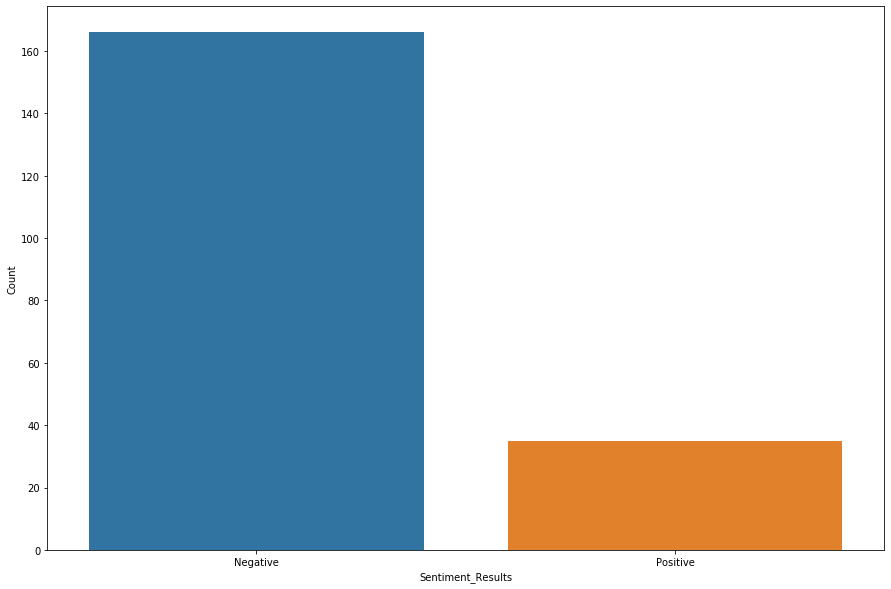

In [111]:
sns.countplot('Analysis', data=df)
_ = plt.xlabel('Sentiment_Results')
_ = plt.ylabel('Count')
plt.show()

## Subjectivity and Polarity analysis

Classifying public expression on how artificial intelligence(AI) evolve in today's generation. Identify the polarity as positive, neutral, and negative each sentiment or opinions and assigns labels to the document based on the aggregate score.

In [121]:
##Change the string to integers modeling preparation

def getAnalysis(score):
    if score <0:
        return  0 ##'Negative'
    #elif score ==0:
        #return 1 ##'Neutral'
    else:
        return 2 ##'Positive'
    
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show new data frame
df.head()

,tweets,Subjectivity,Polarity,Analysis
0,Artificial Intelligence Is Going To Be The End...,1.000000,-0.600000,0
1,The Weaponization Of Artificial Intelligence A...,1.000000,-0.600000,0
2,The Weaponization Of Artificial Intelligence A...,1.000000,-0.600000,0
3,TheChameleon84 wow. I hate Artificial Intellig...,0.966667,-0.358333,0
4,this artificial intelligence performance kind ...,0.866667,-0.200000,0


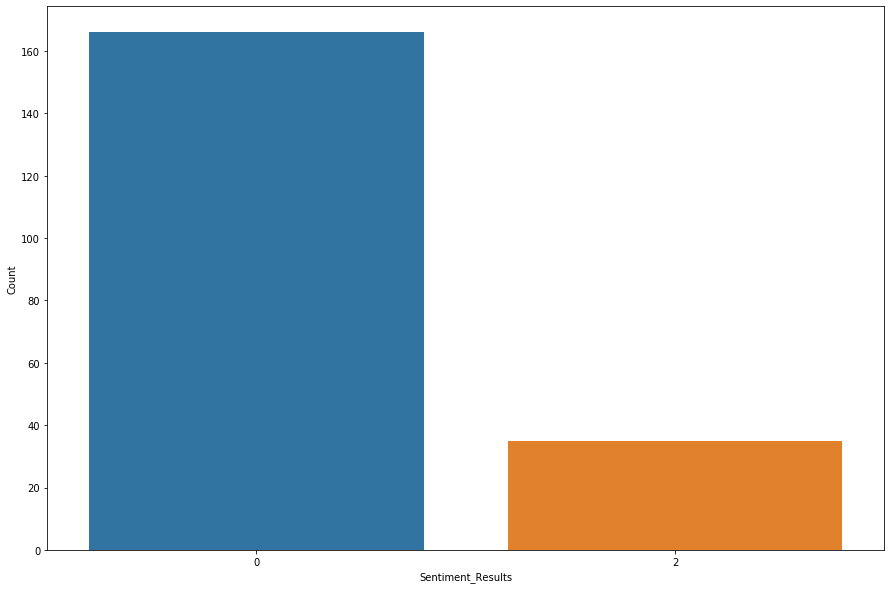

In [122]:
sns.countplot('Analysis', data=df)
_ = plt.xlabel('Sentiment_Results')
_ = plt.ylabel('Count')
plt.show()

## Polarity and Subjectivity Analysis Results 
Classifying public expression on how artificial intelligence (AI) evolve in today's generation. Identify the polarity as positive, neutral, and negative each sentiment or opinions and assigns labels to the document based on the aggregate score. First, looking at the data in the string, then convert to integers for modeling analysis.

# CountVectorizer and TFIDF

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import EnglishStemmer
import seaborn as sns
import matplotlib.pyplot as plt
stemmer = EnglishStemmer()

In [29]:
# Isolate the tweets in a corpus list
corpus = df['tweets']

cv = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xcv = cv.fit_transform(corpus)

# Create a TF-IDF vectorizer to compare results. 
tfidf = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b')
Xti = tfidf.fit_transform(corpus)

# Print length of the dictionaries to serve as a baseline. 
print("Count Vectorizer dictionary: %s" % len(cv.get_feature_names()))
print('TF-IDF Vectorizer words in dictionary: %s' % len(tfidf.get_feature_names()))

Count Vectorizer dictionary: 1306
TF-IDF Vectorizer words in dictionary: 1306


In [30]:
stemmer = EnglishStemmer()

# Builds Count and TF-IDF analyzers that consider patterns and stop words. 
cv3 = CountVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()
tfidf3 = TfidfVectorizer(token_pattern=r'\b[^\d\W]+\b', stop_words='english').build_analyzer()

print(tfidf3)

# Loops over every word to find the stemmed word for faster computation
def stemmed_cv_words(doc):
    return (stemmer.stem(w) for w in cv3(doc))

def stemmed_tfidf_words(doc):
    return (stemmer.stem(w) for w in tfidf3(doc))

# Final vectorizer that outputs dictionary lengths
cv_stem = CountVectorizer(analyzer=stemmed_cv_words)
cv3 = cv_stem.fit_transform(corpus)

tfidf_stem = TfidfVectorizer(analyzer=stemmed_tfidf_words)
tfidf3 = tfidf_stem.fit_transform(corpus)

##print(tfidf3)

print('Stemmed Count_Vectorizer: %s' % len(cv_stem.get_feature_names()))
print('Stemmed TF-IDF: %s' % len(tfidf_stem.get_feature_names()))

functools.partial(<function _analyze at 0x000001D7F65FB8B8>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, tokenizer=<built-in method findall of re.Pattern object at 0x000001D7F7535E70>, preprocessor=functools.partial(<function _preprocess at 0x000001D7F6580798>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer(stop_words='english', token_pattern='\\b[^\\d\\W]+\\b')>, stop_words=frozenset({'do', 'eg', 'my', 'together', 'un', 'as', 'him', 'her', 'not', 'due', 'down', 'we', 'alone', 'most', 'always', 'each', 'although', 'almost', 'wherever', 'has', 'throughout', 'twenty', 'herself', 'hence', 'nobody', 'whose', 'noone', 'hers', 'others', 'somewhere', 'whoever', 'several', 'becoming', 'once', 'why', 'though', 'amoungst', 'whereby', 'above', 'done', 'seems', 'four', 'bill', 'against', 'during', 'through', 'namely', 'eight', 'whereupon', 'two', 'anyone', 'nine'

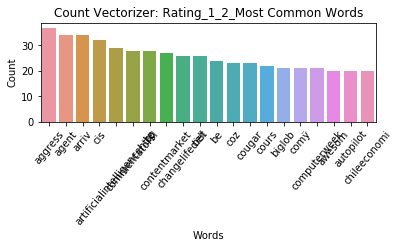

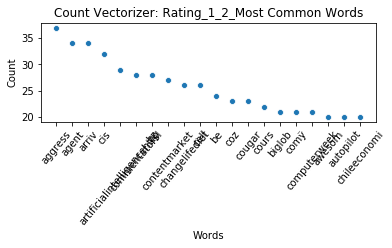

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gets the labels and sum of words for Count Vectorizer. Then, we convert to Pandas series 
# and Data top10 most common words. 
# Finally, we plot the most common words to see how the vectorizer has stemmed the words. 
cv_labels, cv_values = cv_stem.get_feature_names(), cv3.sum(axis=1)
cv_labels = pd.Series(cv_labels)
cv_values = pd.DataFrame(cv_values)
cv_count = pd.concat([cv_labels, cv_values], axis=1, ignore_index=True)
cv_count.columns = ['labels', 'values']
cv_count = cv_count.sort_values(by=['values'], ascending=False)

cv_count_top20 = cv_count[:20]

# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 1)
sns.barplot(x='labels', y='values', data=cv_count_top20)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count')
_ = plt.title('Count Vectorizer: Rating_1_2_Most Common Words')
plt.show()


# Plot the vectorizers for visual comparison. 
plt.subplot(2, 1, 2)
sns.scatterplot(x='labels', y='values', data=cv_count_top20)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Count')
_ = plt.title('Count Vectorizer: Rating_1_2_Most Common Words')
plt.show()

In [32]:
print(cv_count_top20)

                         labels  values
19                      aggress    37.0
18                        agent    34.0
46                        arriv    34.0
157                         cis    32.0
52   artificialintelligencehttp    29.0
171               commentatorsl    28.0
127                          bz    28.0
183               contentmarket    27.0
144              changelifediet    26.0
138                        cell    26.0
82                           be    24.0
195                         coz    23.0
191                      cougar    23.0
193                       cours    22.0
92                       biglob    21.0
178                        comÿ    21.0
177                computerweek    21.0
66                       awesom    20.0
65                    autopilot    20.0
152                chileeconomi    20.0


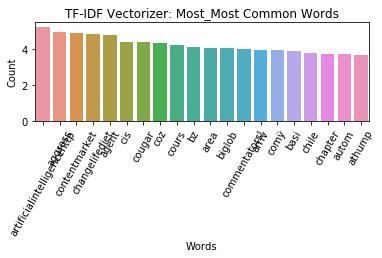

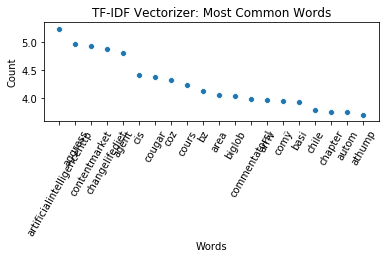

In [33]:
# Repeat the process for the TF-IDF Vectorizer. 
tfidf_labels, tfidf_values = tfidf_stem.get_feature_names(), tfidf3.sum(axis=1)
tfidf_labels = pd.Series(tfidf_labels)
tfidf_values = pd.DataFrame(tfidf_values)
tfidf_count = pd.concat([tfidf_labels, tfidf_values], axis=1, ignore_index=True)
tfidf_count.columns = ['labels', 'values']
tfidf_count = tfidf_count.sort_values(by=['values'], ascending=False)

# Select the top ten most common words to verify if the vectorizers are splitting the same way. 
tfidf_count_top20 = tfidf_count[:20]

plt.subplot(2, 1, 2)
sns.barplot(x='labels', y='values', data=tfidf_count_top20)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count')
_ = plt.title('TF-IDF Vectorizer: Most_Most Common Words')
plt.show()



plt.subplot(2, 1, 2)
sns.scatterplot(x='labels', y='values', data=tfidf_count_top20)
_ = plt.xlabel('Words')
_ = plt.xticks(rotation=60)
_ = plt.ylabel('Count')
_ = plt.title('TF-IDF Vectorizer: Most Common Words')
plt.show()


In [34]:
print(tfidf_count_top20)

                         labels    values
52   artificialintelligencehttp  5.233419
19                      aggress  4.953681
183               contentmarket  4.922485
144              changelifediet  4.868394
18                        agent  4.800896
157                         cis  4.408644
191                      cougar  4.381120
195                         coz  4.331427
193                       cours  4.233353
127                          bz  4.121691
43                         area  4.054617
92                       biglob  4.046486
171               commentatorsl  3.989853
46                        arriv  3.972415
178                        comÿ  3.958154
76                         basi  3.927903
151                       chile  3.785536
148                     chapter  3.757834
63                        autom  3.748534
57                       athump  3.703755


# Topic Modeling

In [35]:
corpus = df['tweets']

MyCountV = CountVectorizer(token_pattern=r'\b[^\d\W]+\b')
MyDTM = MyCountV.fit_transform(corpus)


In [36]:
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list

MyDTM = MyDTM.toarray()  # convert to a regular array
print(list(vocab)[10:20])
ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
print(MyDTM_DF)

['accurate', 'achieve', 'actually', 'adam', 'adf', 'administrative', 'advanced', 'advice', 'aexit', 'affect']
     a  able  about  aboutai  aboutÿ  above  abra  access  according  account  \
0    0     0      0        0       0      0     0       0          0        0   
1    0     0      0        0       0      0     0       0          0        0   
2    0     0      0        0       0      0     0       0          0        0   
3    0     0      0        0       0      0     0       0          0        0   
4    0     0      0        0       0      0     0       0          0        0   
..  ..   ...    ...      ...     ...    ...   ...     ...        ...      ...   
196  0     0      0        0       0      0     0       0          0        0   
197  0     0      0        0       0      0     0       0          0        0   
198  0     0      0        0       0      0     0       0          0        0   
199  0     0      0        0       0      0     0       0          0        0   

In [37]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
num_topics = 6

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)


print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

SIZE:  (201, 6)


In [39]:
## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV)

Topic:   0
[('artificial', 30.249335627122797), ('intelligence', 30.041012264270748), ('http', 18.758438000984707), ('ai', 14.543362098118688), ('and', 13.753823004455322), ('ly', 12.398493469575689), ('com', 10.621163053946729), ('twitter', 7.4975775122651), ('data', 6.622898773297444), ('in', 6.156495961685157)]
Topic:   1
[('http', 7.83265726780773), ('intelligence', 7.699376857101288), ('and', 6.755272707970052), ('on', 6.14809375136737), ('bit', 4.56556411616168), ('ly', 4.4739582054515035), ('tech', 4.468831300355872), ('artificial', 4.00680156750661), ('this', 3.574485864930407), ('trade', 3.2694927313884987)]
Topic:   2
[('artificial', 168.11149133032148), ('intelligence', 167.08812520385484), ('http', 79.73117787343193), ('the', 78.5385774671344), ('of', 54.81421982084844), ('to', 47.25686701067143), ('a', 46.47119055905558), ('com', 43.46469521248257), ('in', 43.26236745542254), ('and', 41.347839909059665)]
Topic:   3
[('bit', 2.238877682103949), ('music', 1.7180330539574198)

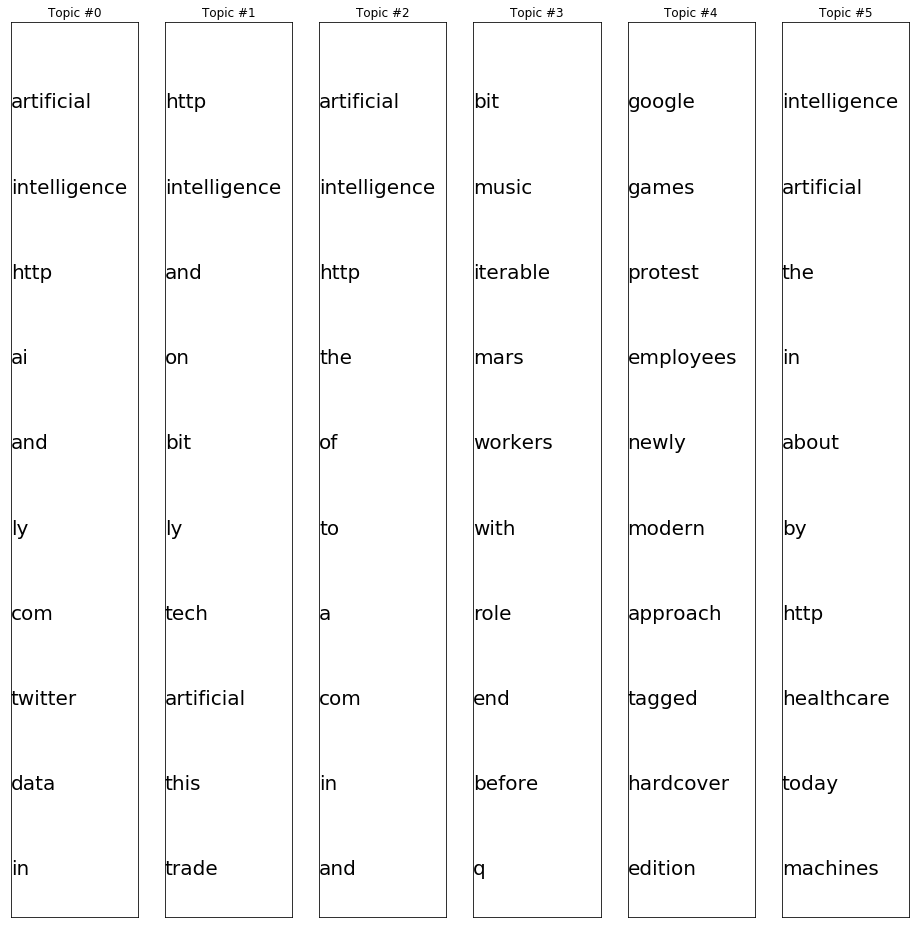

In [40]:
import matplotlib.pyplot as plt
import numpy as np

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20
fig, axs = plt.subplots(5, 5,figsize=(13,13))
for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [146]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

dtm = np.matrix(MyDTM)
pyLDAvis.sklearn.prepare(lda_model_DH, dtm, MyCountV)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.166173 -0.057449       1        1  57.315758
2     -0.001964  0.106886       2        1  13.522002
4     -0.019228  0.094631       3        1  11.765087
1      0.015830 -0.062412       4        1   8.275102
3      0.068705 -0.054736       5        1   6.358903
5      0.102830 -0.026921       6        1   2.763149, topic_info=              Term        Freq       Total Category  logprob  loglift
1121           the   73.000000   73.000000  Default  30.0000  30.0000
581   intelligence  165.000000  165.000000  Default  29.0000  29.0000
70      artificial  164.000000  164.000000  Default  28.0000  28.0000
1150            to   42.000000   42.000000  Default  27.0000  27.0000
566             in   46.000000   46.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
652          least    0.335437    0.891944   Topic6  -5.6603   2.6108
1001        series    0.611893    1.680837   Topic6  -5.0592   2.5783
508           hate    0.611448    2.089374   Topic6  -5.0599   2.3600
891        project    0.523654    4.008226   Topic6  -5.2149   1.5535
833     perception    0.335536    1.404824   Topic6  -5.6600   2.1569

[338 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.785456        a
0         2  0.054169        a
0         3  0.108339        a
0         5  0.054169        a
2         1  0.486917    about
...     ...       ...      ...
1296      1  0.471168      you
1296      3  0.353376      you
1296      4  0.117792      you
1299      2  0.955889  youtube
1303      1  0.952011        ÿ

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4, 6])

## Splitting Data for Training and Test
The data shows that there was more public who are concern about artificial intelligence. The data are about equality distributed.

In [41]:
df2=df ## change data name to df2 to prevent reprocessing and save time.

In [42]:
from sklearn.model_selection import train_test_split
# Convert label back to int.
#df2['Analysis'] = df['Analysis'].astype('int')
# Split the data into train and test sets.
#np.random.seed()
x_train, x_test, y_train, y_test = train_test_split(df2['tweets'], df2['Analysis'], test_size=0.33, random_state=5)

## Transform
Vectorize and transform the training and test by utilizing from sklearn.feature_extraction.text import TfidfVectorizer. With min depth of 2, max depth of 0.8 sublinear true and  English stop word. 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=2, max_df=0.8, sublinear_tf=True, use_idf=True, stop_words='english')


# Count and transform the training and testing sets.
x_train_tfidf = tf.fit_transform(x_train)
x_test_tfidf = tf.transform(x_test)

## SVM Model
Model1- SVM Model package use from sklearn.SVM import LinearSVC and use LinearSVC. 0- means negative, 1- neutral and 2- positive. The result shows more 0, which means it is negative connotation on AI. 

In [44]:
from sklearn.svm import LinearSVC

# Now to use an svm to create the model. 
model1 = LinearSVC()
model1.fit(x_train_tfidf, y_train)
result1 = model1.predict(x_test_tfidf)
print(result1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]


## NLTK classifier Model2
Model2- from nltk.classify import SklearnClassifier and use LinearSVC.

In [45]:
import nltk
from nltk.classify import SklearnClassifier

nltkTrain = x_train.index.values
nltkTest = x_test.index.values
train = df2.iloc[nltkTrain, [0, 3]]
test = df2.iloc[nltkTest, [0, 3]]

In [46]:
train

,tweets,Analysis
177,Artificial Intelligence will be the future of ...,0
19,Wowzers Artificial Intelligence has finally go...,0
57,The internet gets physical: The project ? a re...,0
66,Can Artificial Intelligence Like IBMs Watson D...,0
139,How is Artificial Intelligence ChangingÿScienc...,0
...,...,...
73,Is Google looking for the Artificial Intellige...,0
144,A Talent Intelligence Platform goes far beyond...,0
118,bbctech Machines will achieve human level arti...,0
189,Working on my school project (Artificial Intel...,2


In [47]:
test

,tweets,Analysis
119,Does artificial intelligence fit in Workplace ...,0
77,Fat Freddys Drop - Cays Crays (Artificial Inte...,0
149,"Off to bed, got artificial intelligence & grap...",0
150,TechnoBuffalo Japanese Figure Out How to Trans...,0
193,In a very short time AI has been integrated in...,0
...,...,...
59,"Artificial Intelligence, beginning or the end?...",0
186,Paul Roetzer explores potential of artificial ...,0
12,"Maja_Stina Funny, that sounds just like what a...",2
74,Ive always wondered if I could make an AI... y...,1


In [48]:
tweets = []
for index, row in train.iterrows():
    wordsFiltered = [e.lower() for e in row.tweets.split() if len(e) >= 2]
    wordsCleaned = [word for word in wordsFiltered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    tweets.append((wordsCleaned, row.Analysis))

In [49]:
def getWordsTweets(tweets):
    all = []
    for (words, label) in tweets:
        all.extend(words)
    return all
def getWordFeatures(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
wFeatures = getWordFeatures(getWordsTweets(tweets))
def extractFeatures(document):
    docWords = set(document)
    features = {}
    for word in wFeatures:
        features['contains(%s)' % word] = (word in docWords)
    return features   
# Splits the test set into positive, neutral, and negative to predict.
testPos = test[test['Analysis'] == 2]
testPos = testPos['tweets']
testNrl = test[test['Analysis']==1]
testNrl = testNrl['tweets']
testNeg = test[test['Analysis'] == 0]
testNeg = testNeg['tweets']

In [50]:
# Build the second model.
trainingSet = nltk.classify.apply_features(extractFeatures,tweets)
model2 = nltk.NaiveBayesClassifier.train(trainingSet)
print(model2)

In [53]:
from sklearn.metrics import accuracy_score
# SVM results.
print('SVM Accuracy: %s ' % (accuracy_score(y_test, result1)))
# NLTK results.
negCnt = 0
nrlCnt = 0
posCnt = 0
for obj in testNeg: 
    res = model2.classify(extractFeatures(obj.split()))
    if(res == 0): 
        negCnt += 1
for obj in testNrl:
    res = model2.classify(extractFeatures(obj.split()))
    if(res == 1):
        nrlCnt += 1
for obj in testPos: 
    res =  model2.classify(extractFeatures(obj.split()))
    if(res == 2): 
        posCnt += 1
total = negCnt + nrlCnt + posCnt
print('BNB Accuracy: %s ' % (total/len(test)))
print(negCnt)
print(nrlCnt)
print(posCnt)

SVM Accuracy: 0.8208955223880597 
BNB Accuracy: 0.8656716417910447 
58
0
0


In [13]:
df

,tweets
0,Artificial Intelligence Is Going To Be The End...
1,The Weaponization Of Artificial Intelligence A...
2,The Weaponization Of Artificial Intelligence A...
3,TheChameleon84 wow. I hate Artificial Intellig...
4,this artificial intelligence performance kind ...
...,...
196,Artificial intelligence can now be used to kee...
197,Forex trading service guarantees 99.9% profita...
198,"I had forgotten how much I liked that movie,AI..."
199,What are prominent positive examples of strong...


In [41]:
## Vocab
from sklearn.feature_extraction.text import CountVectorizer
import string


In [43]:
def text_cleaning(df):
 remove_punctuation = [char for char in df if char not in string.punctuation]
 #print(remove_punctuation)
 remove_punctuation=''.join(remove_punctuation)
 #print(remove_punctuation)   
 return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]


bow_transformer_tweets = CountVectorizer(analyzer=text_cleaning).fit(df['tweets']) 
#bow_transformer_d = bow_transformer_d.sort_values(by=['values'], ascending=False)
  
#print(len(bow_transformer.vocabulary_))   
bow_transformer_tweets.vocabulary_

{'Artificial': 54,
 'Intelligence': 249,
 'Going': 211,
 'End': 152,
 'World': 523,
 'Robots': 403,
 'Dumbies': 143,
 'Weaponization': 507,
 'ArtificialIntelligencehttpswwwforbescomsitescognitiveworld20190114theweaponizationofartificialintelligenceÿ': 56,
 'AI': 26,
 'httpsbuffly2TLkz3uÿpictwittercompr2lTzcR95': 888,
 'TheChameleon84': 467,
 'wow': 1298,
 'hate': 791,
 'Im': 240,
 'stupid': 1195,
 'Hate': 223,
 'agents': 540,
 'P': 350,
 'artificial': 562,
 'intelligence': 951,
 'performance': 1066,
 'kind': 971,
 'fucked': 762,
 'full': 763,
 'biotechnological': 591,
 'paranoia': 1059,
 'interactions': 953,
 'personalized': 1069,
 'possibly': 1085,
 'malevolent': 1005,
 'httpbitly1cJpXbzÿ': 813,
 '3': 14,
 'Final': 180,
 'Invention': 252,
 'Human': 231,
 'Era': 157,
 'httpamznto1sUnROSÿ': 807,
 'thinks': 1232,
 'stef': 1186,
 'enroll': 710,
 'piece': 1075,
 'sadistic': 1151,
 'call': 607,
 'clients': 625,
 'saturday': 1152,
 'many': 1007,
 'business': 606,
 'newsletter': 1046,
 'canno

In [47]:
## Semtiment 
Trandf_DT= bow_transformer_tweets.transform(df['tweets'])
Df_DT = Trandf_DT.toarray()
print(Df_DT)

Df_DT.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(201, 1307)

In [48]:
# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_DT=TfidfTransformer().fit(Trandf_DT)
print(tfidf_transformer_DT)

Dress_Tops=tfidf_transformer_DT.transform(Trandf_DT)
print(Dress_Tops)# got tfidf values for whole vocabulary
print(Dress_Tops.shape) 

TfidfTransformer()
  (0, 523)	0.4381684034824769
  (0, 403)	0.38407959228538724
  (0, 249)	0.25967679165510477
  (0, 211)	0.4381684034824769
  (0, 152)	0.38407959228538724
  (0, 143)	0.4381684034824769
  (0, 54)	0.24811095909762765
  (1, 507)	0.6513802834044553
  (1, 249)	0.20803996720853252
  (1, 56)	0.7020769142386898
  (1, 54)	0.1987740046607793
  (2, 888)	0.6623376099458567
  (2, 507)	0.6145105348518615
  (2, 249)	0.19626438622260056
  (2, 54)	0.18752290026392654
  (2, 26)	0.3316642060647495
  (3, 1298)	0.36521228758646274
  (3, 1195)	0.36521228758646274
  (3, 791)	0.3388404867988321
  (3, 540)	0.36521228758646274
  (3, 467)	0.36521228758646274
  (3, 350)	0.32012939636673704
  (3, 249)	0.10821998386890394
  (3, 240)	0.3056159470843565
  (3, 223)	0.36521228758646274
  :	:
  (197, 25)	0.28131003607177746
  (197, 1)	0.23540509457272027
  (198, 1278)	0.40021213068503503
  (198, 1033)	0.4565728403145204
  (198, 1031)	0.4565728403145204
  (198, 988)	0.42360393866723767
  (198, 756)	0.456

In [56]:
words, values = pd.DataFrame(np.array(bow_transformer_tweets.get_feature_names())), pd.DataFrame(np.array(Dress_Tops.mean(axis=0))).transpose()

# Build a dataframe with the words and tf-idf results to view words with both the highest and lowest scores. 
review_tweets = pd.concat([words, values], axis=1)
review_tweets.columns = ['Words', 'tf-idf']
review_tweets_Rslt = review_tweets.sort_values(by=['tf-idf'], ascending=True)


print('Top 20 highest frequency: ') 
print(review_tweets_Rslt.iloc[:20, :], '\n')


Top 20 highest frequency: 
                                                  Words    tf-idf
773                                        geoeconomics  0.000947
1119                                            reading  0.000947
1089                                          predicted  0.000947
1222                                      technological  0.000947
493                                             USChina  0.000947
524                                               Worth  0.000947
577                                               basis  0.000947
1252                                         underlying  0.000947
902   httpswwwcigionlineorgarticlestradewarfuelledte...  0.000947
535                                            actually  0.000947
120                                          DanCiuriak  0.000947
685                                              domain  0.000947
700                                           emergence  0.000947
646                                           cou

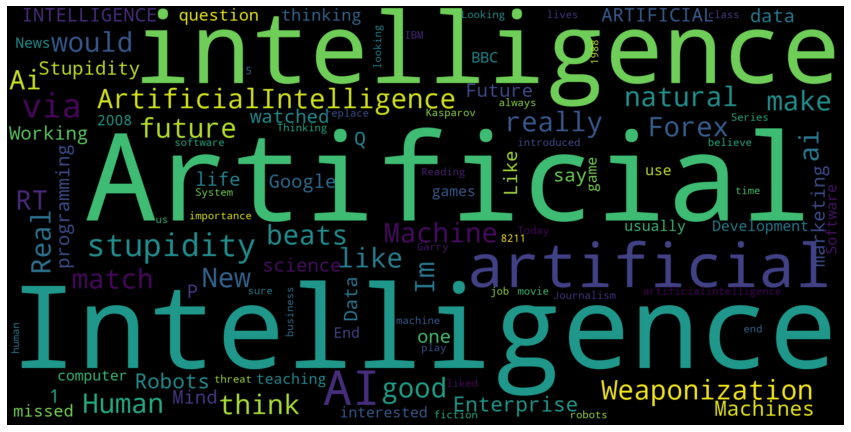

In [58]:
# Create a dictionary with the words and TF-IDF values that will be passed into WordCloud()
from wordcloud import WordCloud, ImageColorGenerator
d = {}
for a, x in review_tweets_Rslt.values:
    d[a] = x

# Adjust image parameters to increase height and width of figure, create word cloud, and show image
plt.rcParams['figure.figsize'] = [15, 10]
wordcloud = WordCloud(scale=5)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
#Splitting the data

from sklearn.model_selection import train_test_split
import numpy as np
# Convert label back to int.
#df2['Analysis'] = df['Analysis'].astype('int')
# Split the data into train and test sets.
np.random.seed(220)
x_train, x_test, y_train, y_test = train_test_split(df['tweets'], df['Analysis'], test_size=0.33, random_state=50)

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=2, max_df=0.8, sublinear_tf=True, use_idf=True, stop_words='english')


# Count and transform the training and testing sets.
x_train_ld = tf.fit_transform(x_train)
x_test_ld = tf.transform(x_test)

In [113]:
##sentiment
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [114]:
##sentiment
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Now to use an svm to create the model. 
#model1= LinearSVC()
model1=SVC()
model1.fit(x_train_ld, y_train)

result1 = model1.predict(x_test_ld)
#print(result1)

print('SVM Accuracy: %s ' % (accuracy_score(y_test, result1)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result1)

SVM Accuracy: 0.7761194029850746 


array([[52,  1],
       [14,  0]], dtype=int64)

In [115]:
from sklearn.naive_bayes import MultinomialNB

Mul_model2 = MultinomialNB()
Mul_model2.fit(x_train_ld, y_train)

result2 = Mul_model2.predict(x_test_ld)
#print(result2)

print('MNB Accuracy: %s ' % (accuracy_score(y_test, result2)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result2)

MNB Accuracy: 0.7910447761194029 


array([[53,  0],
       [14,  0]], dtype=int64)

In [116]:
##sentiment
from sklearn.naive_bayes import BernoulliNB
Bern_clf_ld = BernoulliNB()
Bern_clf_ld.fit(x_train_ld, y_train)

Bern_result_ld = Bern_clf_ld.predict(x_test_ld)
#print(Bern_result_ld)

print('Bern: %s ' % (accuracy_score(y_test, Bern_result_ld)))

metrics.confusion_matrix(y_test, Bern_result_ld)

Bern: 0.7910447761194029 


array([[53,  0],
       [14,  0]], dtype=int64)

In [117]:


# Now to use an svm to create the model. 
model1=SVC(verbose=1)
model1.fit(x_train_ld, y_train)

result1 = model1.predict(x_test_ld)
#print(result1)

print('SVM Accuracy: %s ' % (accuracy_score(y_test, result1)))

# print the confusion matrix
metrics.confusion_matrix(y_test, result1)

[LibSVM]SVM Accuracy: 0.7761194029850746 


array([[52,  1],
       [14,  0]], dtype=int64)

In [118]:
len_score= cross_val_score(model1,x_train_ld, y_train, cv=5)
len_score.mean()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

0.8358974358974359

In [119]:
MNB_score= cross_val_score(Mul_model2,x_train_ld, y_train, cv=5)
MNB_score.mean()

0.8433048433048432

In [120]:
Bern_score= cross_val_score(Bern_clf_ld,x_train_ld, y_train, cv=5)
Bern_score.mean()

0.8284900284900285